## Ley de Benford

La Ley de Benford es una ley de probabilidad que describe la distribución de los primeros dígitos en una gran cantidad de conjuntos de datos numéricos. La ley fue descubierta por el matemático estadounidense Frank Benford en 1938 y se ha demostrado que es aplicable a una amplia variedad de datos, incluyendo poblaciones de países, tallas de ríos, logaritmos de números prime y muchos otros.

### Distribución Esperada
La distribución esperada de los primeros dígitos según la Ley de Benford es la siguiente:

$$P(d) = \log_{10} \left(1 + \frac{1}{d}\right)$$

donde $d$ es el primer dígito y $P(d)$ es la probabilidad de que el primer dígito sea $d$.

### Ley Generalizada de Orden Superior

La ley de Benford generalizada de orden superior es una extensión de la ley original que considera los primeros dígitos más allá del primer dígito. La fórmula para la ley generalizada de orden superior es la siguiente:

$$P(d_1, d_2, \dots, d_n) = \log_{10} \left(1 + \frac{1}{d_1 \cdot 10^{n-1} + d_2 \cdot 10^{n-2} + \dots + d_n \cdot 10^0}\right)$$

donde $d_1, d_2, \dots, d_n$ son los primeros $n$ dígitos y $P(d_1, d_2, \dots, d_n)$ es la probabilidad de que los primeros $n$ dígitos sean $d_1, d_2, \dots, d_n$.

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import chisquare
import matplotlib.pyplot as plt

In [2]:
df_fraud = pd.read_csv('bs140513_032310.csv')
df_fraud.head() 

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
def benford_law(transactions, max_digits):
    for n_digits in range(1, max_digits + 1):
        # Calcular la distribución esperada según generalizaciones de la Ley de Benford
        expected_distribution = [math.log10(1 + 1 / d) for d in range(10**(n_digits - 1), 10**n_digits)]
        
        # Convertir las transacciones a enteros
        transactions = [int(x) for x in transactions]
        
        # Obtener los primeros N dígitos de las transacciones
        first_n_digits = [int(str(int(abs(x)))[:n_digits]) for x in transactions if len(str(int(abs(x)))) >= n_digits]
        
        # Calcular la distribución observada
        observed_distribution = [first_n_digits.count(d) / len(first_n_digits) for d in range(10**(n_digits - 1), 10**n_digits)]
        
        # Normalizar las distribuciones
        expected_distribution = [x / sum(expected_distribution) for x in expected_distribution]
        observed_distribution = [x / sum(observed_distribution) for x in observed_distribution]
        
        # Realizar el test estadístico
        chi2, p = chisquare(observed_distribution, f_exp=expected_distribution)
        
        # Crear una figura con un subgráfico
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # Graficar la distribución esperada y observada
        ax.bar(range(10**(n_digits - 1), 10**n_digits), expected_distribution, alpha=0.5, color='black', label='Esperado')
        ax.bar(range(10**(n_digits - 1), 10**n_digits), observed_distribution, alpha=0.5, color='red', label='Observado')
        
        # Agregar los porcentajes en cada columna del gráfico
        for i in range(10**(n_digits - 1), 10**n_digits):
            ax.text(i - 0.25, expected_distribution[i - 10**(n_digits - 1)] + 0.01, f'{expected_distribution[i - 10**(n_digits - 1)]:.2%}')
            ax.text(i - 0.25, observed_distribution[i - 10**(n_digits - 1)] + 0.01, f'{observed_distribution[i - 10**(n_digits - 1)]:.2%}')
        
        ax.set_title(f'Primeros {n_digits} Dígitos')
        ax.set_title(f'Primeros {n_digits} Dígitos (p-value: {p:.4f})')
        ax.legend()
        
        # Añadir una conclusión basada en el p-value
        if p < 0.05:
            conclusion = 'Los datos no distribuyen según la Ley de Benford'
        else:
            conclusion = 'Los datos distribuyen según la Ley de Benford'
        
        plt.figtext(0.5, 0.01, conclusion, wrap=True, horizontalalignment='center', fontsize=12)
        
        plt.show()

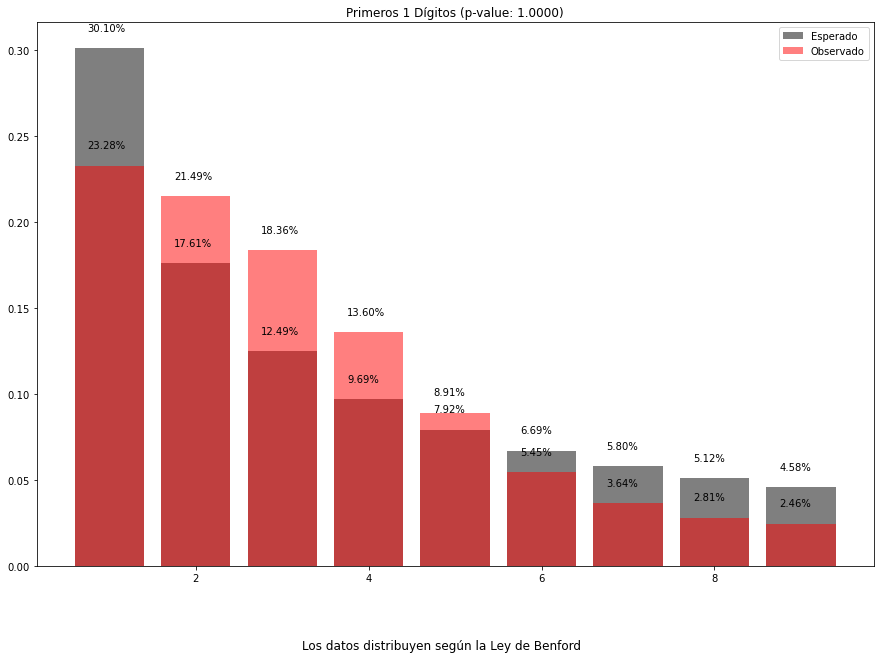

In [4]:
benford_law(df_fraud['amount'], 1)